In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [5]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import randint, uniform
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    Lasso,
    LinearRegression,
    LogisticRegression,
    Ridge,
    SGDClassifier,
)

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    r2_score,
    make_scorer,
)

from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    StandardScaler,
    minmax_scale,
)

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [9]:
df = pd.read_csv(f'diabetes_012_health_indicators_BRFSS2015.csv.zip')

display(df.head())

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
print("Dataset shape:")
print(df.shape)

Dataset shape:
(253680, 22)


In [11]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
print("\nFrequency of each label value:")
print(df.Diabetes_012.value_counts())
print("\nDistribution of the target:")
print(df.Diabetes_012.value_counts(normalize=1))
print("\nFeatures:")
print(df.columns)


Frequency of each label value:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Distribution of the target:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Features:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [13]:
df.Diabetes_012.replace(2.0, 1.0, inplace=True)
print(df.Diabetes_012.value_counts(normalize=1))
df.columns = df.columns.str.replace(" ", "")

Diabetes_012
0.0    0.842412
1.0    0.157588
Name: proportion, dtype: float64


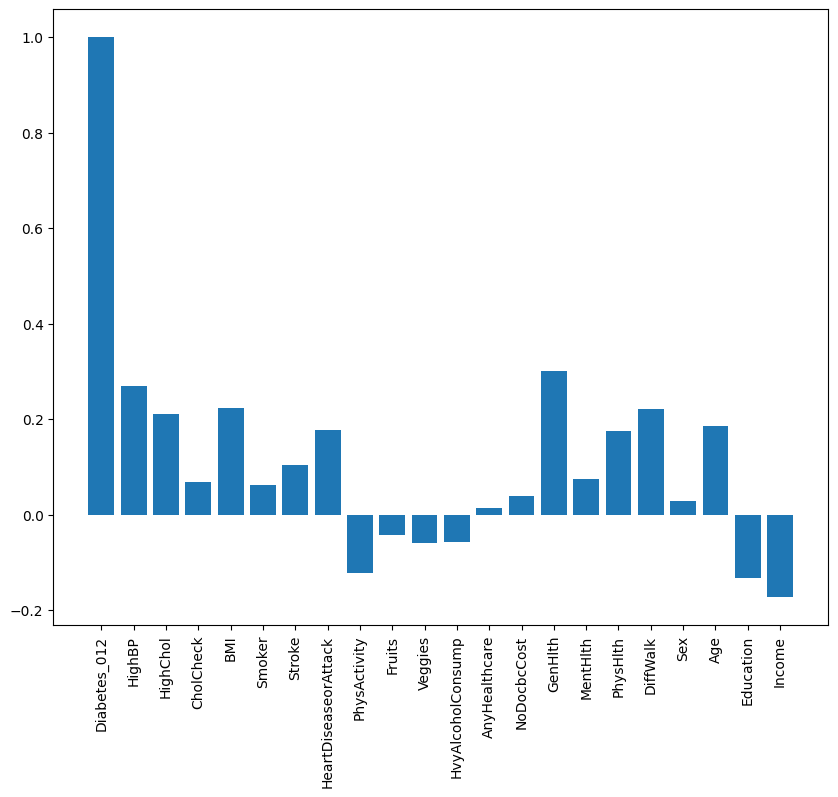

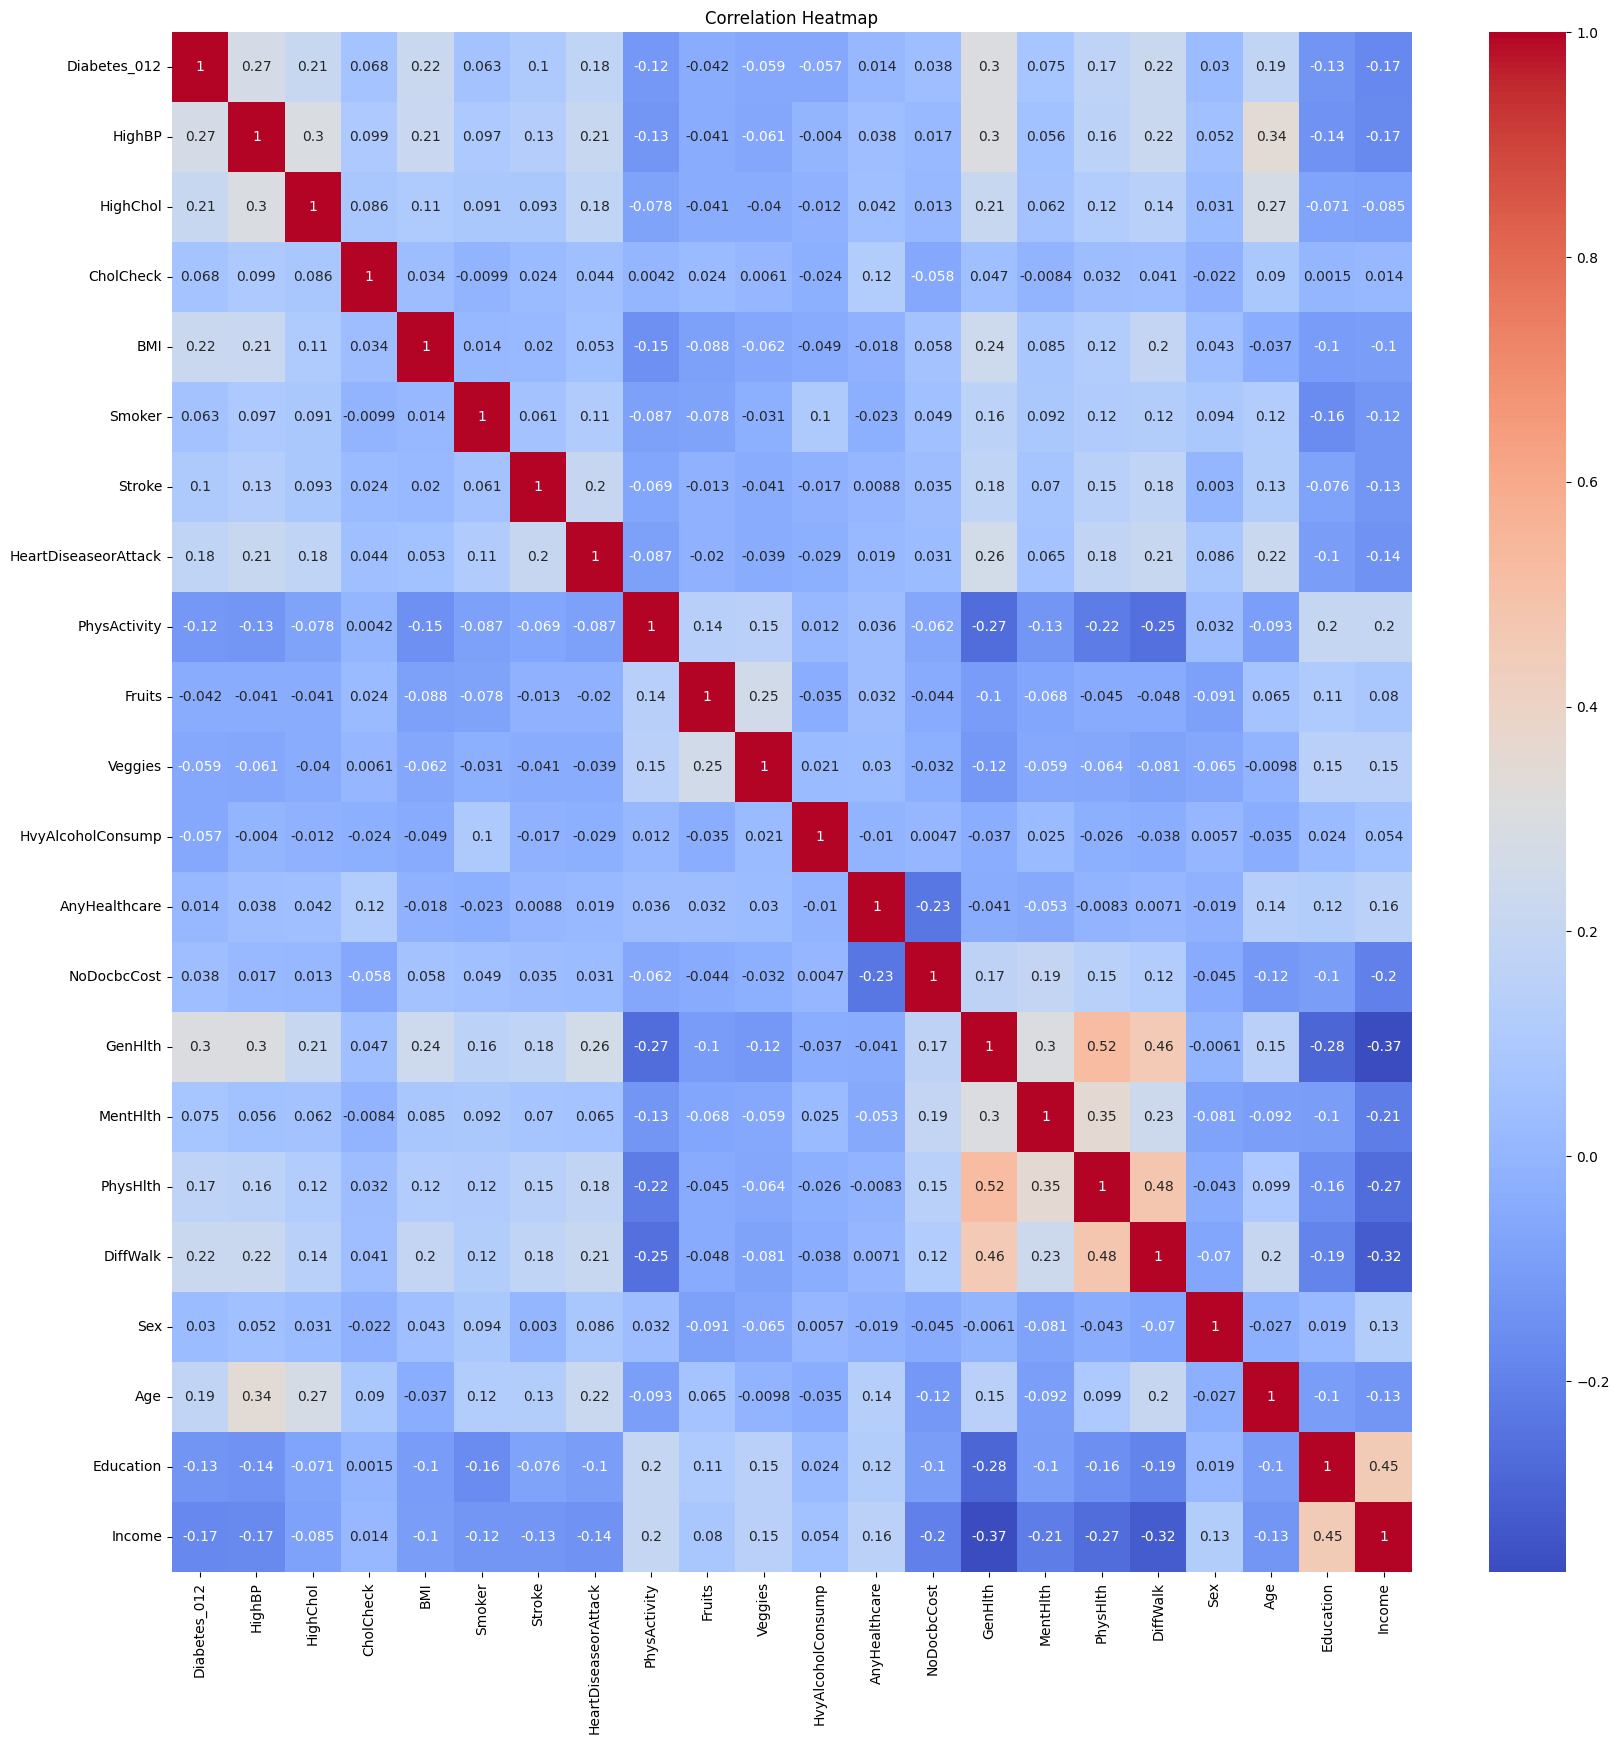

In [14]:
plt.figure(figsize=(10, 8))
df.corr("pearson")["Diabetes_012"]
fig2 = plt.bar(
    df.corr("pearson")["Diabetes_012"].index, df.corr("pearson")["Diabetes_012"]
)
plt.xticks(rotation=90)

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[df.columns].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Drop features with weak correlation

print(df.columns)
df.columns = df.columns.str.replace(" ", "")
df.drop(["Fruits", "Veggies", "NoDocbcCost"], axis=1, inplace=True)
print(df.shape)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

print(y.value_counts())

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
(253680, 19)
Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64


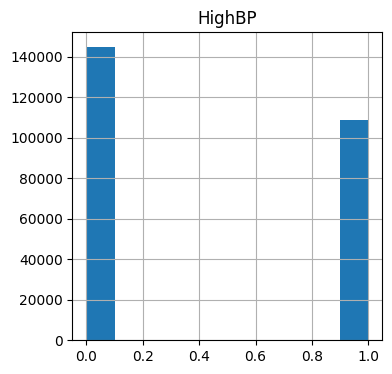

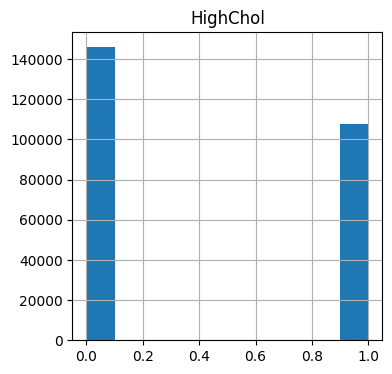

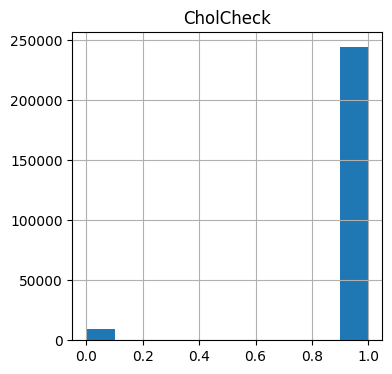

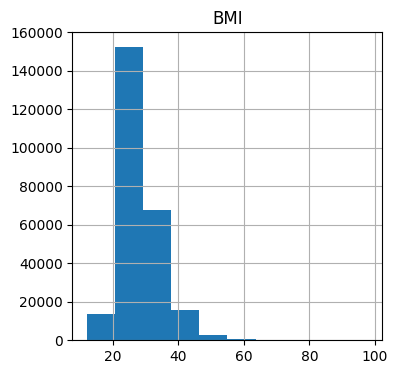

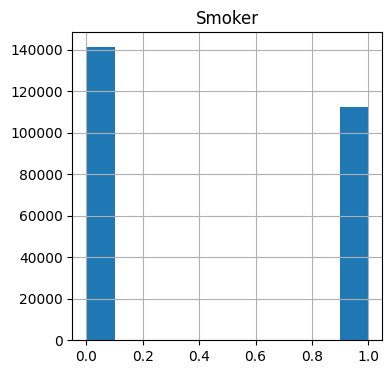

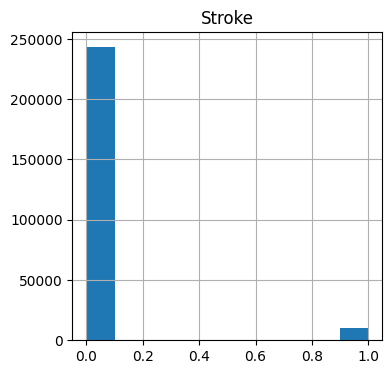

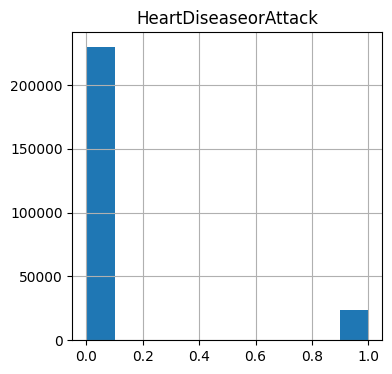

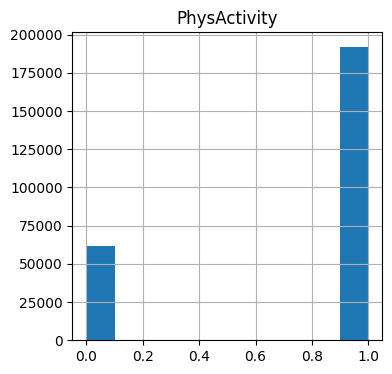

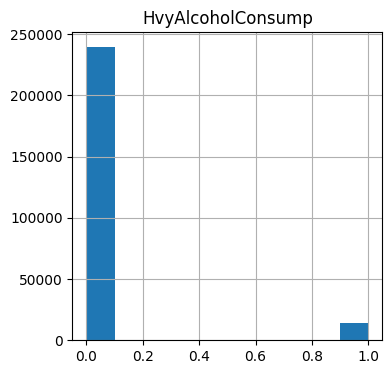

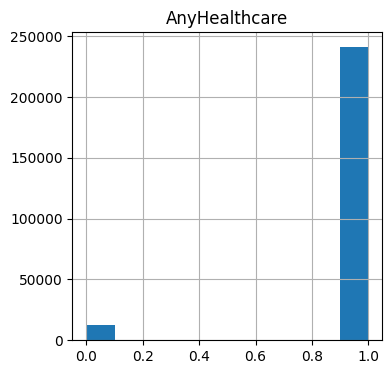

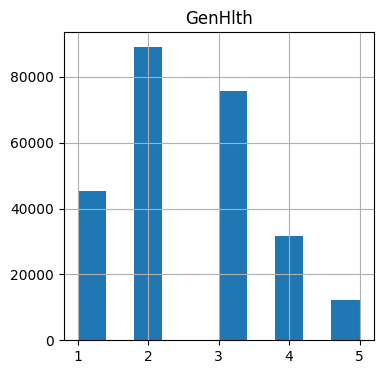

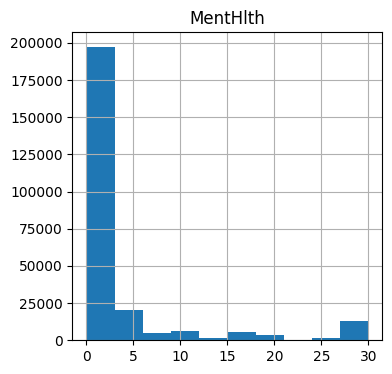

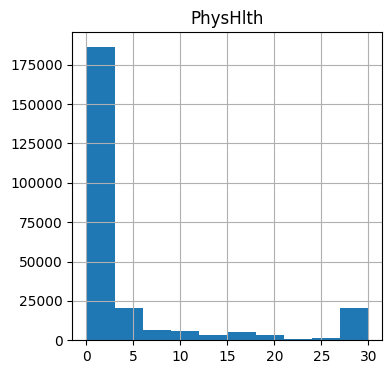

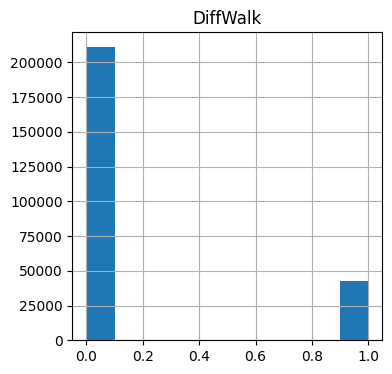

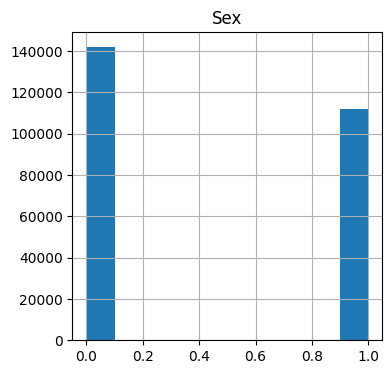

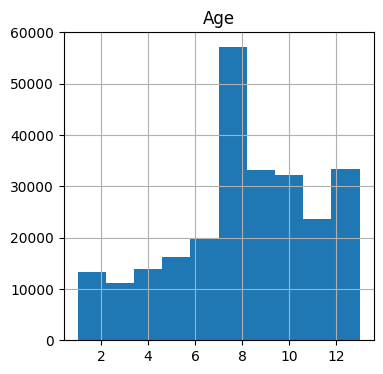

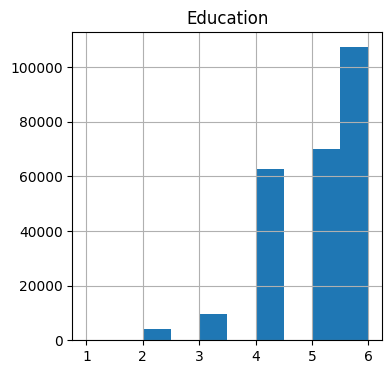

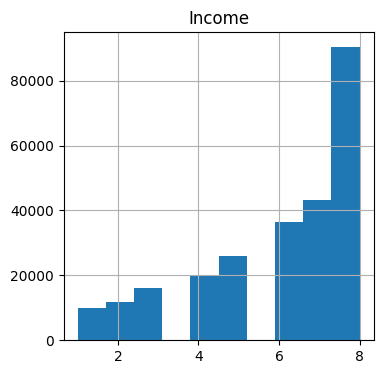

In [16]:
for c in X.columns:
    hist = X.hist(column=c, figsize=(4, 4))

**Drop features with weak correlation, standardize and normalize.**

In [17]:
bmi_scaler = StandardScaler()
cols_to_scale = ["BMI"]
bmi_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = bmi_scaler.transform(df[cols_to_scale])
# fig = df.hist(column="BMI", figsize=(5, 5))
# df.hist(column="GenHlth", figsize=(5, 5))

gh_scaler = StandardScaler()
cols_to_scale = ["GenHlth"]
gh_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = gh_scaler.transform(df[cols_to_scale])
# df.hist(column="GenHlth", figsize=(5, 5))
# df.hist(column="MentHlth", figsize=(5, 5))

ment_scaler = MinMaxScaler()
cols_to_scale = ["MentHlth"]
ment_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = ment_scaler.transform(df[cols_to_scale])
# df.hist(column="MentHlth", figsize=(5, 5))
# df.hist(column="PhysHlth", figsize=(5, 5))

phys_scaler = MinMaxScaler()
cols_to_scale = ["PhysHlth"]
phys_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = phys_scaler.transform(df[cols_to_scale])
# df.hist(column="PhysHlth", figsize=(5, 5))
# df.hist(column="Age", figsize=(5, 5))

age_scaler = MinMaxScaler()
cols_to_scale = ["Age"]
age_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = age_scaler.transform(df[cols_to_scale])
# df.hist(column="Age", figsize=(5, 5))

import warnings
warnings.filterwarnings("ignore")
# df.hist(column="Income", figsize=(5, 5))

income_cat_to_avg_map = {
    1: 5,
    2: 12.5,
    3: 17.5,
    4: 22.5,
    5: 30.0,
    6: 42.5,
    7: 62.5,
    8: 75,
}
# df = df.assign(Income=X.Income.map(income_cat_to_avg_map))

# df.hist(column="Income", figsize=(5, 5))
inc_scaler = MinMaxScaler()
cols_to_scale = ["Income"]
inc_scaler.fit(df[cols_to_scale])
df[cols_to_scale] = inc_scaler.transform(df[cols_to_scale])
# df.hist(column="Income", figsize=(5, 5))
# df.hist(column="Education", figsize=(5, 5))

edu_scaler = MinMaxScaler()
cols_to_scale = ["Education"]
edu_scaler.fit(df[cols_to_scale])
df[cols_to_scale] = edu_scaler.transform(df[cols_to_scale])
# df.hist(column="Education", figsize=(5, 5))
# Sex!

df["Sex"].value_counts(normalize=True)
gender = df["Sex"]
gender = gender.values.reshape(-1, 1)
encoder = OneHotEncoder(categories="auto", sparse_output=False)
gender_encoded = encoder.fit_transform(gender)
print(gender_encoded)
gender_encoded_df = pd.DataFrame(
    gender_encoded, columns=encoder.get_feature_names_out(["gender"])
)

df.reset_index(drop=True, inplace=True)
gender_encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df.drop("Sex", axis=1), gender_encoded_df], axis=1)
df_encoded

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,gender_0.0,gender_1.0
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,1.0,2.329121,0.6,0.500000,1.0,0.666667,0.6,0.285714,1.0,0.0
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,0.0,0.457294,0.0,0.000000,0.0,0.500000,1.0,0.000000,1.0,0.0
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,0.0,1.0,2.329121,1.0,1.000000,1.0,0.666667,0.6,1.000000,1.0,0.0
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,0.0,1.0,-0.478619,0.0,0.000000,0.0,0.833333,0.4,0.714286,1.0,0.0
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,0.0,1.0,-0.478619,0.1,0.000000,0.0,0.833333,0.8,0.428571,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,2.514516,0.0,0.0,0.0,0.0,0.0,1.0,0.457294,0.0,0.166667,0.0,0.333333,1.0,0.857143,0.0,1.0
253676,1.0,1.0,1.0,1.0,-1.571019,0.0,0.0,0.0,0.0,0.0,1.0,1.393207,0.0,0.000000,1.0,0.833333,0.2,0.428571,1.0,0.0
253677,0.0,0.0,0.0,1.0,-0.057858,0.0,0.0,0.0,1.0,0.0,1.0,-1.414532,0.0,0.000000,0.0,0.083333,0.8,0.142857,1.0,0.0
253678,0.0,1.0,0.0,1.0,-0.814438,0.0,0.0,0.0,0.0,0.0,1.0,0.457294,0.0,0.000000,0.0,0.500000,0.8,0.000000,0.0,1.0


In [18]:
df_encoded.iloc[:, 0].value_counts(normalize=1)

Diabetes_012
0.0    0.842412
1.0    0.157588
Name: proportion, dtype: float64

In [20]:
logistic_reg = LogisticRegression(random_state=0)
param_grid = {
    "penalty": ["l1"],
    "C": [ 0.1, 1.0, 2.0],
    "solver": ["saga"],
    "max_iter": [100, 200, 300],
    "fit_intercept": [True],
}

grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    scoring="f1_weighted",  # Use F1-score as the scoring metric
    cv=5,
    refit=True,
)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

print('---------------------------------------------------------------------')

# The most significant features

coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Best parameters:  {'C': 1.0, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
F1-score on test set:  0.814397515835928
---------------------------------------------------------------------
Feature: Age, Coefficient: 1.4786913163044697
Feature: CholCheck, Coefficient: 1.1868822183138337
Feature: HighBP, Coefficient: 0.7188273381608787
Feature: HvyAlcoholConsump, Coefficient: -0.653143189097544
Feature: HighChol, Coefficient: 0.5915298611317109
Feature: GenHlth, Coefficient: 0.5542514081359291
Feature: gender_0.0, Coefficient: -0.48483130872642094
Feature: BMI, Coefficient: 0.40892427009454835
Feature: Income, Coefficient: -0.3987548127942713
Feature: gender_1.0, Coefficient: -0.2522618959191814
Feature: HeartDiseaseorAttack, Coefficient: 0.21842703872808333
Feature: PhysHlth, Coefficient: -0.2068170494989867
Feature: Education, Coefficient: -0.19997635275422102
Feature: DiffWalk, Coefficient: 0.10339212953833757
Feature: Stroke, Coefficient: 0.09564230405070683


The confusion matrix:

[[0.97130093 0.02869907]
 [0.81495866 0.18504134]]


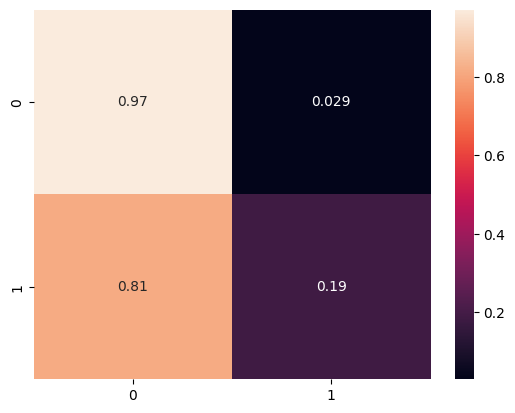

In [21]:
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

The accuracy of prediction on the whole imbalanced binary dataset:0.8146062366132967

The confusion matrix:

[[0.97193769 0.02806231]
 [0.81461841 0.18538159]]


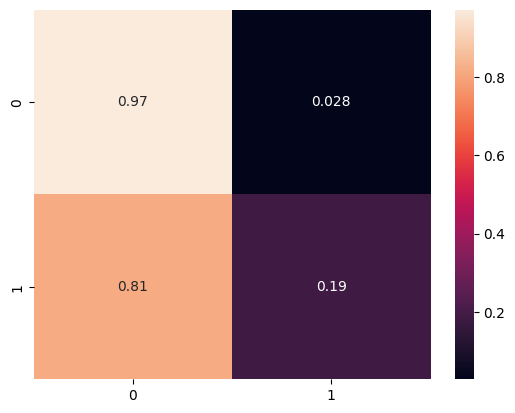

In [22]:
y_pred_all = best_model.predict(X)
print(f'The accuracy of prediction on the whole imbalanced binary dataset:{f1_score(y,y_pred_all,average="weighted")}\n')
print('The confusion matrix:\n')
conf_mat = confusion_matrix(y, y_pred_all, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

In [23]:
sgd = SGDClassifier()

param_dist = {
    'loss':['log', 'modified_huber'],
    'penalty': ['l1', 'l2'],
    'alpha': np.random.uniform(0, 0.01, 5),
    'learning_rate': ['constant', 'optimal'],
    'eta0': np.random.uniform(0, 0.1, 5),
    'max_iter': [100,200,300]
}
random_search = RandomizedSearchCV(
    sgd,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

print('---------------------------------------------------------------------')

# The most significant features

coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Best parameters:  {'penalty': 'l1', 'max_iter': 200, 'loss': 'modified_huber', 'learning_rate': 'optimal', 'eta0': 0.060929708416086484, 'alpha': 0.008986416773909585}
F1-score on test set:  0.7846937494055312
---------------------------------------------------------------------
Feature: Age, Coefficient: 0.2793778121805465
Feature: HighBP, Coefficient: 0.17630664441997423
Feature: HighChol, Coefficient: 0.144017732366253
Feature: GenHlth, Coefficient: 0.14344535162050215
Feature: BMI, Coefficient: 0.11702253784543584
Feature: HeartDiseaseorAttack, Coefficient: 0.0936758622643418
Feature: Income, Coefficient: -0.0688905808365169
Feature: CholCheck, Coefficient: 0.039639703663751816
Feature: gender_0.0, Coefficient: -0.018921588191330323
Feature: Smoker, Coefficient: 0.0
Feature: Stroke, Coefficient: 0.0
Feature: PhysActivity, Coefficient: 0.0
Feature: HvyAlcoholConsump, Coefficient: 0.0
Feature: AnyHealthcare, Coefficient: 0.0
Feature: MentHlth, Coefficient: 0.0
Feature: PhysHlth, Coef


The confusion matrix:

[[0.99352107 0.00647893]
 [0.95326986 0.04673014]]


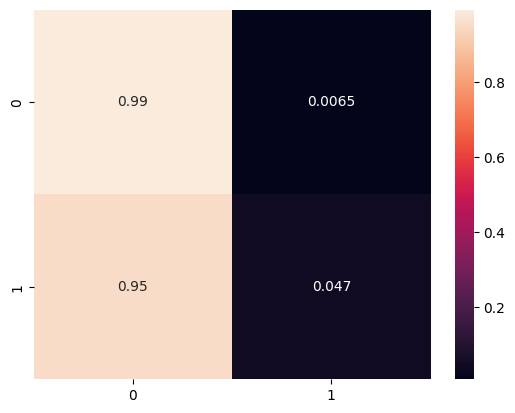

In [24]:
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

In [25]:
xgb_classifier = XGBClassifier()
param_dist = {
    'n_estimators': np.random.randint(100, 1000, 4),  
    'max_depth': np.random.randint(1, 20, 5), 
    'learning_rate': np.random.uniform(0.01, 0.1, 4), 
    'subsample': np.random.uniform(0.5, 1.0, 4), 
    'colsample_bytree': np.random.uniform(0.5, 1.0, 4),  
    'gamma': np.random.uniform(0, 5, 4)  
}


random_search = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    scoring=make_scorer(f1_score),
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

Best parameters:  {'subsample': 0.7956994928218732, 'n_estimators': 158, 'max_depth': 5, 'learning_rate': 0.06565848571277143, 'gamma': 0.30561266395357556, 'colsample_bytree': 0.8494713299001118}
F1-score on test set:  0.8203311351893714
